In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display
import numpy as np


# Read Angel/Q CSVs from ansis
def read_csvs(base_path, start, end):
    frames = []
    for i in range(start, end + 1):
        file_path = f"{base_path}-{i:04d}.75.csv"  # XY-Velocity_V4_H4_W0-{d}.75.csv where d is the time step
        df = pd.read_csv(file_path)
        df["time_step"] = i
        frames.append(df)
    data = pd.concat(frames)
    data.columns = data.columns.str.strip()
    return data

In [111]:
# Adjust the path and time step range accordingly
data = read_csvs("V4_H4_wo-75/XY-Velocity_V4_H4_W0", 1, 375)

In [92]:
data = read_csvs("V4_H1_wo-75/XY-Velocity_V4_H1_W0", 1, 250)

In [108]:
# Step 2: Create Plotting Function
def plot_velocity(time_step):
    df = data[
        data["time_step"] == time_step
    ]  # this is bootleg and should be changed since it uses global data
    plt.figure(figsize=(10, 6))
    plt.quiver(
        df["x-coordinate"],
        df["y-coordinate"],
        df["x-velocity"],
        df["y-velocity"],
        color="b",
    )
    plt.title(f"Velocity Plot for Time Step: {time_step}")
    plt.xlabel("X-coordinate")
    plt.ylabel("Y-coordinate")
    plt.show()

,nodenumber,x-coordinate,y-coordinate,x-velocity,y-velocity,time_step
0,1,-14.696646,-2.5,0.0,0.0,1
1,2,-14.396240,-2.5,0.0,0.0,1
2,3,-14.095835,-2.5,0.0,0.0,1
3,4,-13.795430,-2.5,0.0,0.0,1
4,5,-13.495024,-2.5,0.0,0.0,1
...,...,...,...,...,...,...
4957,4958,13.790993,2.5,0.0,0.0,250
4958,4959,14.093129,2.5,0.0,0.0,250
4959,4960,14.395264,2.5,0.0,0.0,250
4960,4961,14.697400,2.5,0.0,0.0,250


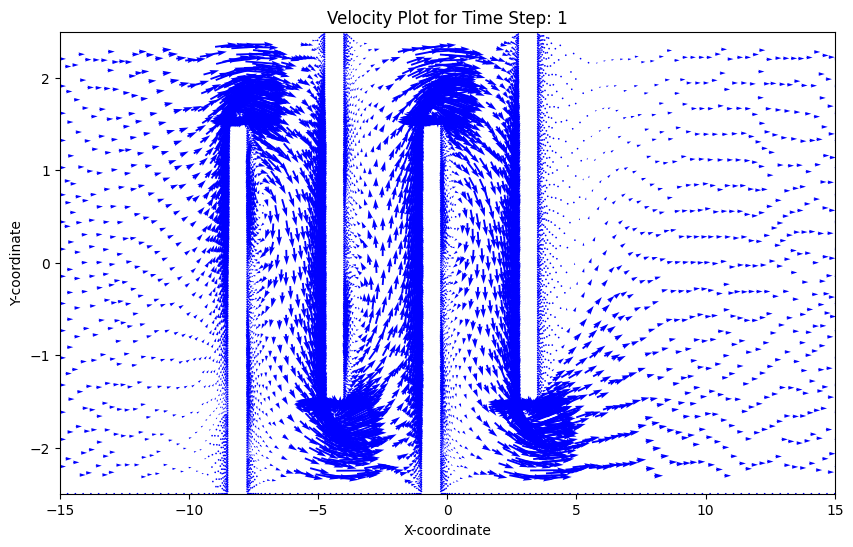

In [112]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML


def update_plot(frame):
    plt.clf()
    time_step = frame + 1  # Adjust based on time step indexing
    df = data[data["time_step"] == time_step]
    plt.quiver(
        df["x-coordinate"],
        df["y-coordinate"],
        df["x-velocity"],
        df["y-velocity"],
        color="b",
        scale=10000,
        scale_units="width",
    )
    plt.title(f"Velocity Plot for Time Step: {time_step}")
    plt.xlabel("X-coordinate")
    plt.ylabel("Y-coordinate")
    plt.xlim(df["x-coordinate"].min(), df["x-coordinate"].max())
    plt.ylim(df["y-coordinate"].min(), df["y-coordinate"].max())


fig, ax = plt.subplots(figsize=(10, 6))
ani = FuncAnimation(fig, update_plot, frames=20, interval=200, repeat=True)

# Display the animation as HTML
HTML(ani.to_html5_video())

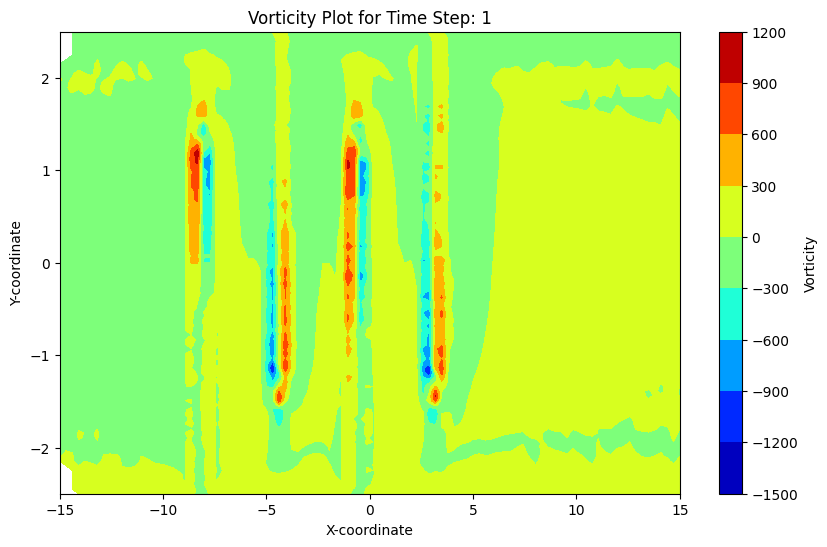

In [113]:
from scipy.interpolate import griddata

# Grid
grid_x, grid_y = np.mgrid[-15:15:100j, -2.5:2.5:100j]


def calculate_vorticity(x, y, u, v):
    # Grid for the velocities
    grid_u = griddata((x, y), u, (grid_x, grid_y), method="cubic")
    grid_v = griddata((x, y), v, (grid_x, grid_y), method="cubic")

    # Gradient
    vy, vx = np.gradient(grid_v), np.gradient(grid_u)

    # Subtract the y-gradient from the x-gradient
    vorticity = vx[1] - vy[0]
    return vorticity


# Update function for the animation
def update_vorticity_plot(frame):
    plt.clf()
    time_step = frame + 1
    df = data[data["time_step"] == time_step]

    # Calculate vorticity
    vorticity = calculate_vorticity(
        df["x-coordinate"], df["y-coordinate"], df["x-velocity"], df["y-velocity"]
    )

    # Plot
    plt.contourf(grid_x, grid_y, vorticity, cmap="jet")
    plt.colorbar(label="Vorticity")
    plt.title(f"Vorticity Plot for Time Step: {time_step}")
    plt.xlabel("X-coordinate")
    plt.ylabel("Y-coordinate")
    plt.xlim(-15, 15)
    plt.ylim(-2.5, 2.5)


# Set up the figure for vorticity plots
fig, ax = plt.subplots(figsize=(10, 6))

# Create the vorticity animation
vorticity_ani = FuncAnimation(
    fig, update_vorticity_plot, frames=50, interval=300, repeat=True
)

# Display the vorticity animation as HTML
HTML(vorticity_ani.to_html5_video())